# Classwork Example for 10 01 2020



I have added two FITS tables to this directory, containing measurements of line ratios for samples of galaxies. 

The first file, 'emission_lines_v5.0_4.fits', contains line fluxes from 266,000 galaxies with redshift z <0.6 that had emission lines observed with Sloan Digital Sky Survey (SDSS) spectroscopy. These data are taken from Tremonti et al. (2004). 

The second file, 'J_ApJ_795_165_table1.dat.fits' contains line flux ratios from a sample of 250 $z\sim2$ galaxies. These data are taken from Steidel et al. (2014).

Your job is to:

**(1) Plot both of these data sets on the axes for a BPT diagram**

**(2) Plot the boundary line between starburst and AGN line ratios given in the text**

**(3) Also plot the boundary lines described in Kewley et al. (2006):**


$\displaystyle \frac{0.61}{\log\left([\mathrm{N II}]/\mathrm{H}\alpha\right) − 0.05} + 1.3 < \log([\mathrm{O III}]/\mathrm{H}\beta)\;\;$   from Kewley et al. (2001)

$\displaystyle \frac{0.61}{\log\left([\mathrm{N II}]/\mathrm{H}\alpha\right) − 0.47} + 1.19 > \log([\mathrm{O III}]/\mathrm{H}\beta)\;\;$   from Kauffmann et al. (2003)

(Note that the area between these two curves is often used to classify galaxies as a 'composite' with both starburst and AGN components). 

**(4) Choose your favorite boundary line, and determine what fraction of galaxies in the SDSS data are starburst-dominated, and what fraction are AGN-dominated. Comment on how the high-redshift sample appears different, and possible reasons for this.** 





In [1]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer

                                            # Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Solution:

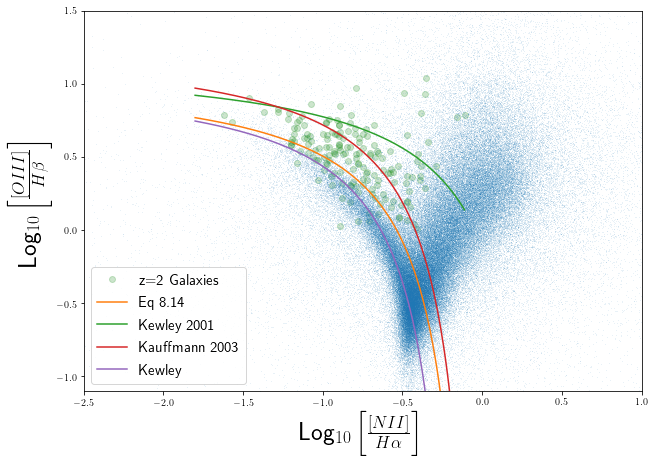

In [18]:
#####
##### z=2 galaxies

hdu_list = fits.open('J_ApJ_795_165_table1.dat.fits')  # open a FITS file
data = hdu_list[1].data  # assume the first extension is a table

#first_two_rows = data[:2]    # get the first two rows
#print(first_two_rows)        # print them to show data structure
#print (hdu_list[1].columns)  # print the names of the columns

N2_Ha = data['log([NII]/Ha)']
O3_Hb = data['log([OIII]/Hb)']

plt.figure(1,figsize=(10,7))
plt.plot(N2_Ha,O3_Hb,'o',color='green',alpha=0.2,label='z=2 Galaxies')

#####
##### SDSS Galaxies

hdu_list2 = fits.open('emission_lines_v5.0_4.fits')
data2 = hdu_list2[1].data

#print (hdu_list2[1].columns)  # print the names of the columns


N2 = data2['NII_6584_FLUX']
Ha = data2['H_ALPHA_FLUX']
O3 = data2['OIII_5007_FLUX']
Hb = data2['H_BETA_FLUX']
z = data2['Z']
#print (np.min(z),np.max(z))   # Check the redshift range of the SDSS sample

plt.plot(np.log10(N2/Ha),np.log10(O3/Hb),',',alpha=0.1)

Ns = np.arange(-1.8,-0.1,0.01)
plt.plot(Ns, 1.1-0.6/(0.01-Ns),label="Eq 8.14") # Eq 18.14
plt.plot(Ns, 1.19+0.61/(Ns-0.47), label="Kewley 2001") # Kewley
plt.plot(Ns, 1.3+0.61/(Ns-0.05),label="Kauffmann 2003") # Kauffmann
plt.plot(Ns, 1.1+0.61/(Ns+0.08),label="Kewley") # Kauffmann
plt.ylim(-1.1,1.5)
plt.xlim(-2.5,1.0)
plt.xlabel('Log$_{10}\\left[ \\frac{[NII]}{H \\alpha}\\right] $',fontsize=25)
plt.ylabel('Log$_{10}\\left[ \\frac{[OIII]}{H \\beta}\\right] $',fontsize=25)
plt.legend(loc=3,fontsize=15);